In [34]:
import toolbox_ml_clean
import importlib
importlib.reload(toolbox_ml_clean) # Para importar la librería de nuevo y que coja los cambios en el código

<module 'toolbox_ml_clean' from 'c:\\Users\\jose\\Documents\\bootcamp\\Team_Challenge\\ML_toolbox1\\TeamChallenge_team8\\toolbox_ml_clean.py'>

**Importamos bibliotecas**

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

**Importamos funciones de nuestro modulo**

In [35]:
from toolbox_ml_clean import (
    describe_df,
    tipifica_variables,
    get_features_num_regression,
    plot_features_num_regression,
    get_features_cat_regression,
    plot_features_cat_regression
)

**Cargamos el dataset y mostramos sus primeras líneas**

In [14]:
data = pd.read_csv("./Team_Challenge/data/sleep_health_and_lifestyle_dataset.csv")

data.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


**Eliminamos la columna "Person ID"**

In [17]:
data.drop("Person ID", axis = 1, inplace=True)

**Con la funcion "describe_df" visualizamos la informacion del dataset.**

In [18]:
result = describe_df(data)
result

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
COL_N,,,,
Gender,object,0.00000,2,0.534759
Age,int64,0.00000,31,8.288770
Occupation,object,0.00000,11,2.941176
Sleep Duration,float64,0.00000,27,7.219251
Quality of Sleep,int64,0.00000,6,1.604278
Physical Activity Level,int64,0.00000,16,4.278075
Stress Level,int64,0.00000,6,1.604278
BMI Category,object,0.00000,4,1.069519
Blood Pressure,object,0.00000,25,6.684492


**Con la funcion "tipifica_variables" obtenemos el tipo sugerido para cada columna**

In [28]:
result = tipifica_variables(data, umbral_categoria=8, umbral_continua=0.5)
result

,nombre_variable,tipo_sugerido
0,Gender,Binaria
1,Age,Numerica Discreta
2,Occupation,Numerica Discreta
3,Sleep Duration,Numerica Discreta
4,Quality of Sleep,Categorica
5,Physical Activity Level,Numerica Discreta
6,Stress Level,Categorica
7,BMI Category,Categorica
8,Blood Pressure,Numerica Discreta
9,Heart Rate,Numerica Discreta


**Con la funcion "get_features_num_regression" para obtener las columnas con una correlacion mayor al umbral (umbral_corr) con relacion a la variable objetivo (taget_col) y que tengan un coeficiente de pearson mayor a "pvalue"**

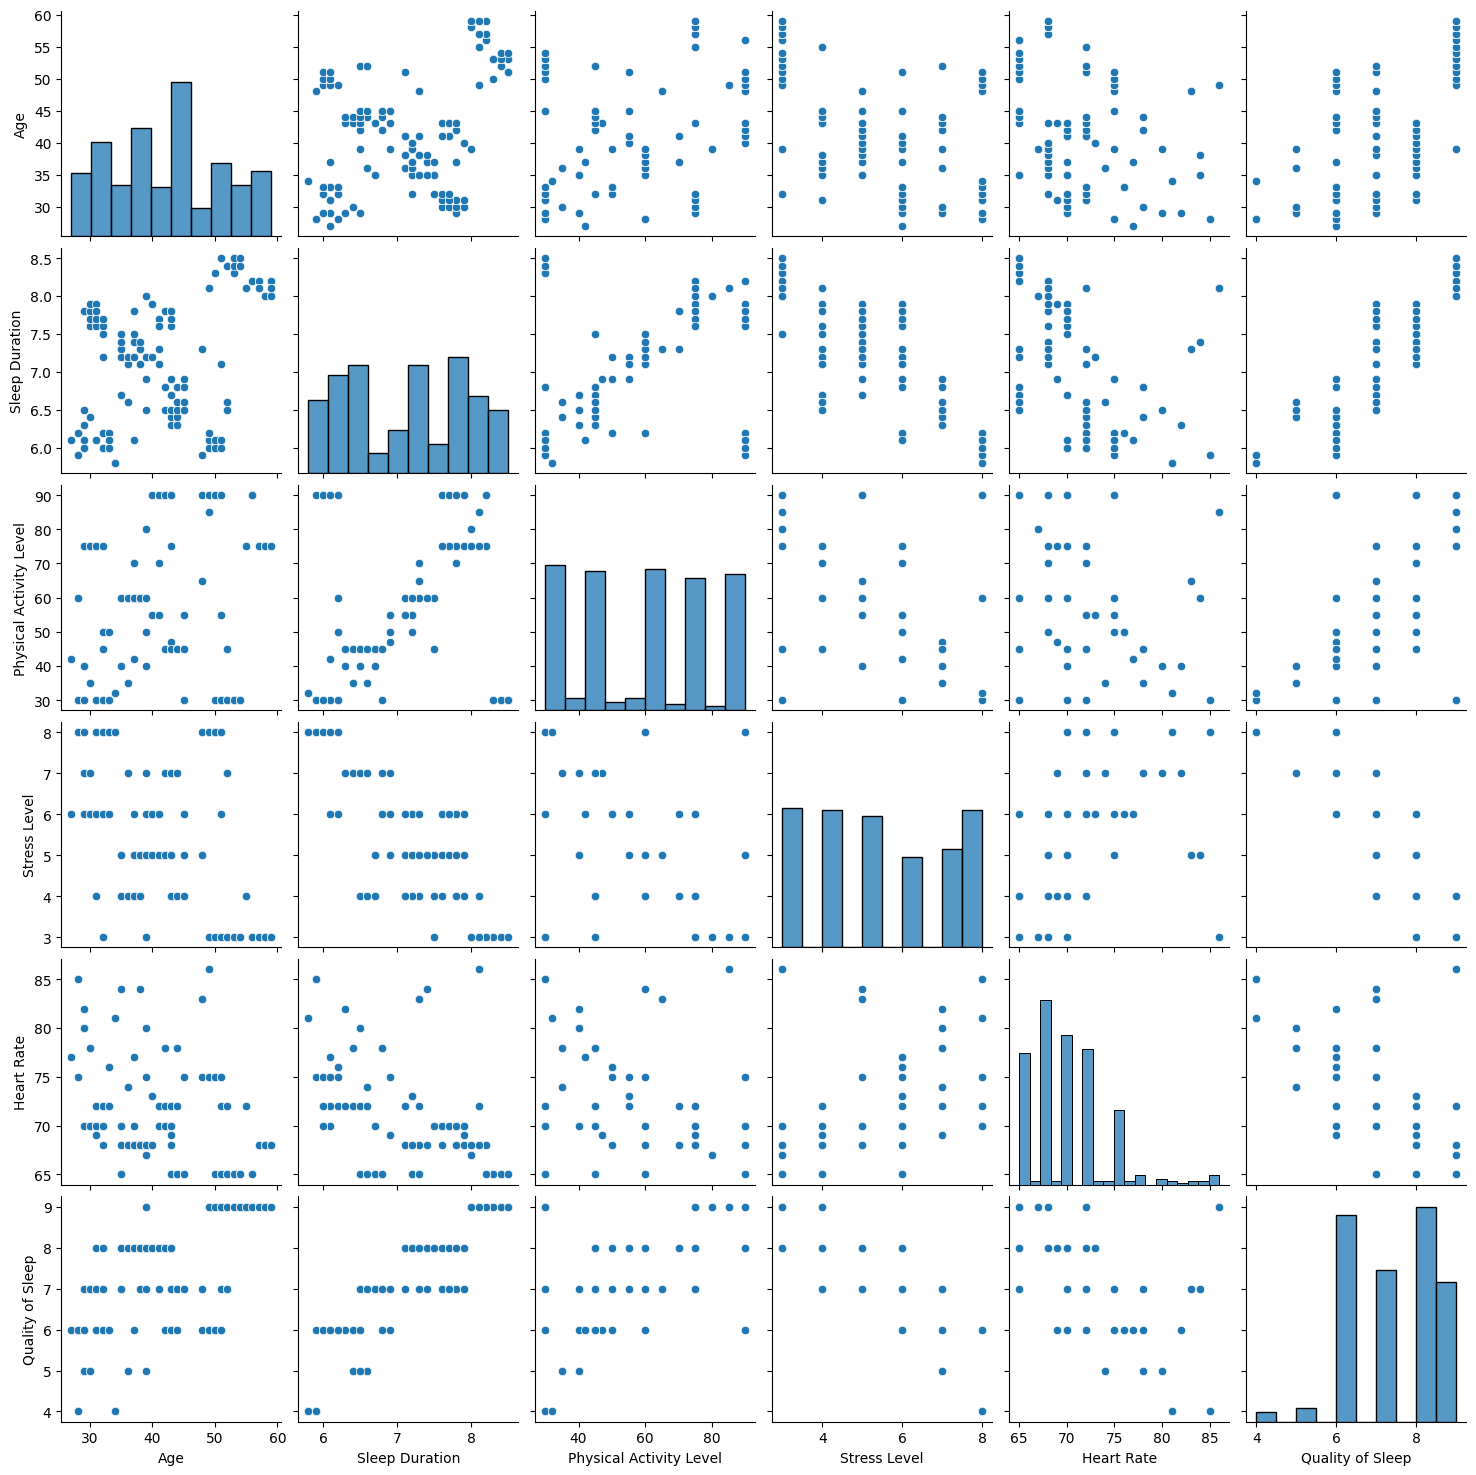

['Age', 'Sleep Duration', 'Physical Activity Level', 'Stress Level', 'Heart Rate']


In [29]:
numerical_features = get_features_num_regression(
    data, 
    target_col="Quality of Sleep",
    umbral_corr=0.1, 
    pvalue=0.05
)
print(numerical_features)


**Con la funcion "plot_features_num_regression"**

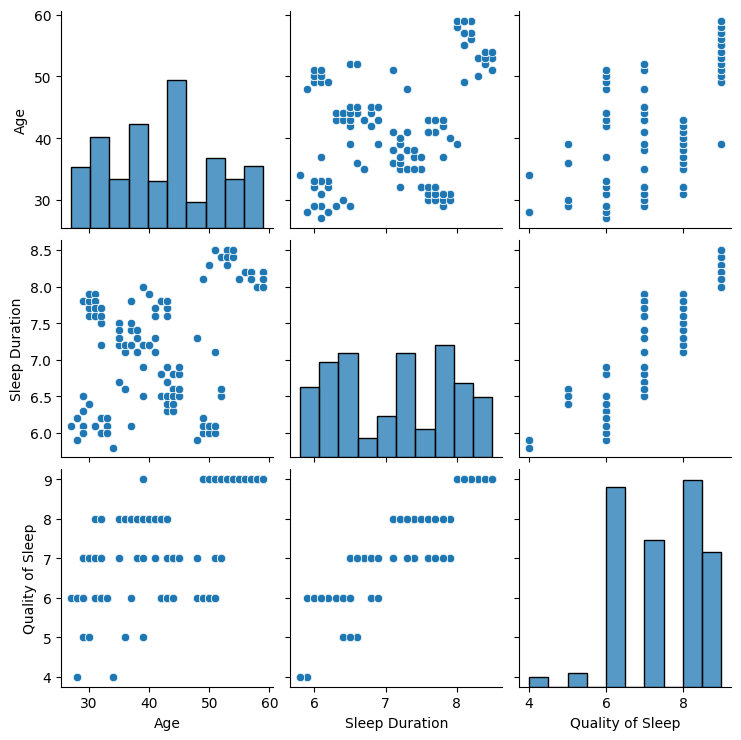

['Age', 'Sleep Duration']

In [39]:
plot_features_num_regression(
    data, 
    target_col="Quality of Sleep",
    columns=["Age", "Sleep Duration"],
    umbral_corr=0.1, 
    pvalue=0.05
)


**Con la función "get_features_cat_regression" obtenemos la lista de las columnas categoricas**

In [40]:
categorical_features = get_features_cat_regression(
    data, 
    target_col="Quality of Sleep",  # Angepasste Zielvariable
    pvalue=0.05
)
print(categorical_features)


['Gender', 'Occupation', 'BMI Category', 'Blood Pressure']


c:\Users\jose\Documents\bootcamp\Team_Challenge\ML_toolbox1\TeamChallenge_team8\toolbox_ml_clean.py:224: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  estadistico, p_valor = f_oneway(*grupos)


In [41]:
print(data['Blood Pressure'].value_counts())

Blood Pressure
130/85    99
140/95    65
125/80    65
120/80    45
115/75    32
135/90    27
140/90     4
125/82     4
128/85     3
132/87     3
117/76     2
130/86     2
126/83     2
119/77     2
135/88     2
128/84     2
131/86     2
139/91     2
115/78     2
129/84     2
142/92     2
118/75     2
118/76     1
122/80     1
121/79     1
Name: count, dtype: int64


**Con la funcion "plot_features_cat_regression" imprimimos los plots de **

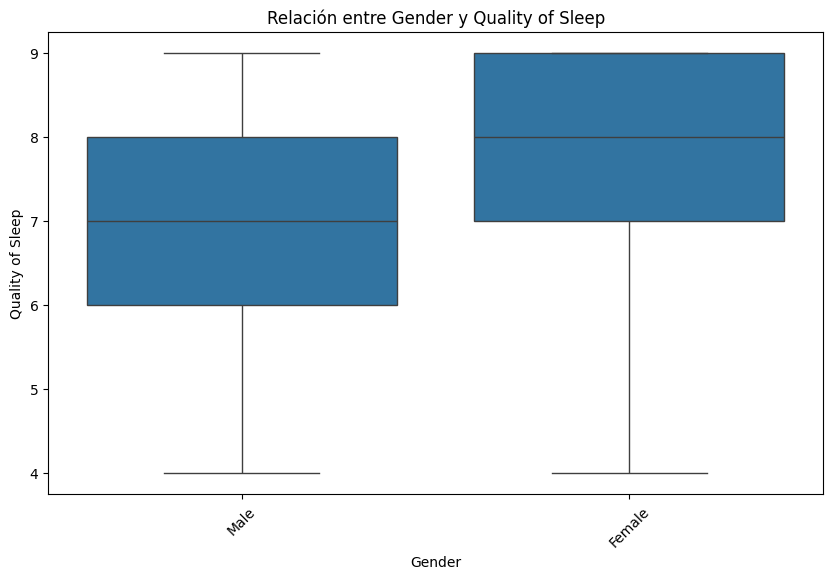

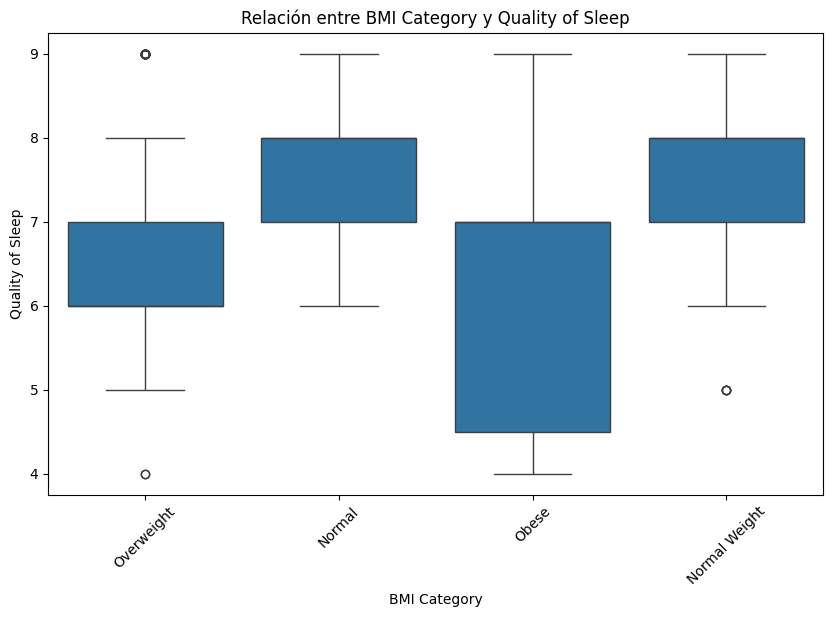

['Gender', 'BMI Category']

In [ ]:
plot_features_cat_regression(
    data,
    target_col="Quality of Sleep",
    columns=["Gender", "BMI Category"],
    pvalue=0.05,
    with_individual_plot=True
)
